## Observations and Insights 

In [1]:
%matplotlib notebook

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
merged_df

#1,893 rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Data Clean-up

In [27]:
# Checking the number of mice in the DataFrame.
mouse_count= merged_df["Mouse ID"].value_counts()
mouse_count

g989    13
g791    10
z795    10
o287    10
m601    10
        ..
t573     1
x336     1
v199     1
x226     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes_mouse=merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
dupes_mouse

array(['g989'], dtype=object)

In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_info= merged_df[merged_df["Mouse ID"]=="g989"]
print(dupe_info.index)
print()
dupe_info.head(13)

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df= merged_df[merged_df["Mouse ID"]!="g989"]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean DataFrame.
mouse_count=cleaned_df["Mouse ID"].count()
mouse_count

1880

## Summary Statistics

## Tumor Response to Treatment

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#MEAN
#Grouping by Drug and Timepoint
tumor_mean_df= cleaned_df.groupby(["Drug Regimen",])["Tumor Volume (mm3)"].mean()

#Converting into Dataframe
tumor_mean_df=pd.DataFrame(tumor_mean_df)

#Resetting indexes
tumor_mean_df=tumor_mean_df.reset_index()

#renaming columns 
tumor_mean_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"},inplace=True)

tumor_mean_df
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Drug Regimen,Mean Tumor Volume (mm3)
0,Capomulin,40.675741
1,Ceftamin,52.591172
2,Infubinol,52.884795
3,Ketapril,55.235638
4,Naftisol,54.331565
5,Placebo,54.033581
6,Propriva,52.320930
7,Ramicane,40.216745
8,Stelasyn,54.233149
9,Zoniferol,53.236507


In [33]:
#SEM
tumor_volume_sem = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
            

#Converting to DataFrame
tumor_sem_df = pd.DataFrame(tumor_volume_sem)

#Resetting indexes
tumor_sem_df=tumor_sem_df.reset_index()

#renaming columns 
tumor_sem_df.rename(columns={"Tumor Volume (mm3)": "SEM Tumor Volume (mm3)"},inplace=True)

tumor_sem_df

,Drug Regimen,SEM Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.544332
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [34]:
#Median
tumor_volume_median = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()

#Converting to DataFrame
tumor_median_df = pd.DataFrame(tumor_volume_median)

#Resetting indexes
tumor_median_df=tumor_median_df.reset_index()

#renaming columns 
tumor_median_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume (mm3)"},inplace=True)

tumor_median_df


,Drug Regimen,Median Tumor Volume (mm3)
0,Capomulin,41.557809
1,Ceftamin,51.776157
2,Infubinol,51.820584
3,Ketapril,53.698743
4,Naftisol,52.509285
5,Placebo,52.288934
6,Propriva,50.446266
7,Ramicane,40.673236
8,Stelasyn,52.431737
9,Zoniferol,51.818479


In [35]:
#Variance

# Demonstrate calculating measures of central tendency
tumor_volume_var = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()

#Converting to DataFrame
tumor_var_df = pd.DataFrame(tumor_volume_var)

#Resetting indexes
tumor_var_df=tumor_var_df.reset_index()

#renaming columns 
tumor_var_df.rename(columns={"Tumor Volume (mm3)": "Var Tumor Volume (mm3)"},inplace=True)

tumor_var_df


,Drug Regimen,Var Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.852013
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [36]:
#Standard Deviation

# Demonstrate calculating measures of central tendency
tumor_volume_sd = cleaned_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()

#Converting to DataFrame
tumor_sd_df = pd.DataFrame(tumor_volume_var)

#Resetting indexes
tumor_sd_df=tumor_sd_df.reset_index()

#renaming columns 
tumor_sd_df.rename(columns={"Tumor Volume (mm3)": "Standard Deviation Tumor Volume (mm3)"},inplace=True)

tumor_sd_df

,Drug Regimen,Standard Deviation Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.852013
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Summary Table

summary_table_df=pd.merge(tumor_mean_df,tumor_sem_df, on="Drug Regimen", how="outer")

summary_table_df=pd.merge(summary_table_df,tumor_median_df, on="Drug Regimen", how="outer")

summary_table_df=pd.merge(summary_table_df,tumor_var_df, on="Drug Regimen", how="outer")

summary_table_df=pd.merge(summary_table_df,tumor_sd_df, on="Drug Regimen", how="outer")

summary_table_df


,Drug Regimen,Mean Tumor Volume (mm3),SEM Tumor Volume (mm3),Median Tumor Volume (mm3),Var Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3)
0,Capomulin,40.675741,0.329346,41.557809,24.947764,24.947764
1,Ceftamin,52.591172,0.469821,51.776157,39.290177,39.290177
2,Infubinol,52.884795,0.492236,51.820584,43.128684,43.128684
3,Ketapril,55.235638,0.603860,53.698743,68.553577,68.553577
4,Naftisol,54.331565,0.596466,52.509285,66.173479,66.173479
5,Placebo,54.033581,0.581331,52.288934,61.168083,61.168083
6,Propriva,52.320930,0.544332,50.446266,43.852013,43.852013
7,Ramicane,40.216745,0.320955,40.673236,23.486704,23.486704
8,Stelasyn,54.233149,0.573111,52.431737,59.450562,59.450562
9,Zoniferol,53.236507,0.516398,51.818479,48.533355,48.533355


## Bar Plots

In [38]:
#Filter the DataFrame down only to chose those columns to chart
#Pandas Method
drug_timepoint=cleaned_df[["Drug Regimen","Timepoint"]]

#Set the index to be "Drug Regimen" so they will be used as labels
drug_timepoint=drug_timepoint.set_index("Drug Regimen")

drug_data=cleaned_df["Drug Regimen"].value_counts()

drug_data.plot(kind="bar", facecolor="blue")
                    
# Set textual properties
plt.title("Pymaceuticals")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

# Show plot
plt.show()
# Resize plot to display labels
plt.tight_layout()

In [39]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Matplotlib Method. Different approach discussed in class.

drug_mouse=cleaned_df[["Drug Regimen","Mouse ID"]]
drug_mouse

#grouping by drugs
drug_mouse_groupby_df= drug_mouse.groupby(["Drug Regimen"])

#counting 
drug_mouse_groupby_df.count()

#resetting indexes
drug_mouse_data=drug_mouse_groupby_df["Mouse ID"].count().to_frame(name="Count Mouse ID").reset_index()
drug_mouse_data.count().head()

#sorting
drug_mouse_data=drug_mouse_data.sort_values(["Count Mouse ID"], ascending=False)

#defining x and y
count_mouse=drug_mouse_data["Count Mouse ID"]
drug=drug_mouse_data["Drug Regimen"]

#bar chart
x_axis = np.arange(len(count_mouse))
plt.bar(x_axis, count_mouse, color='b', alpha=1, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()
plt.tight_layout()


## Pie Plots

<IPython.core.display.Javascript object>


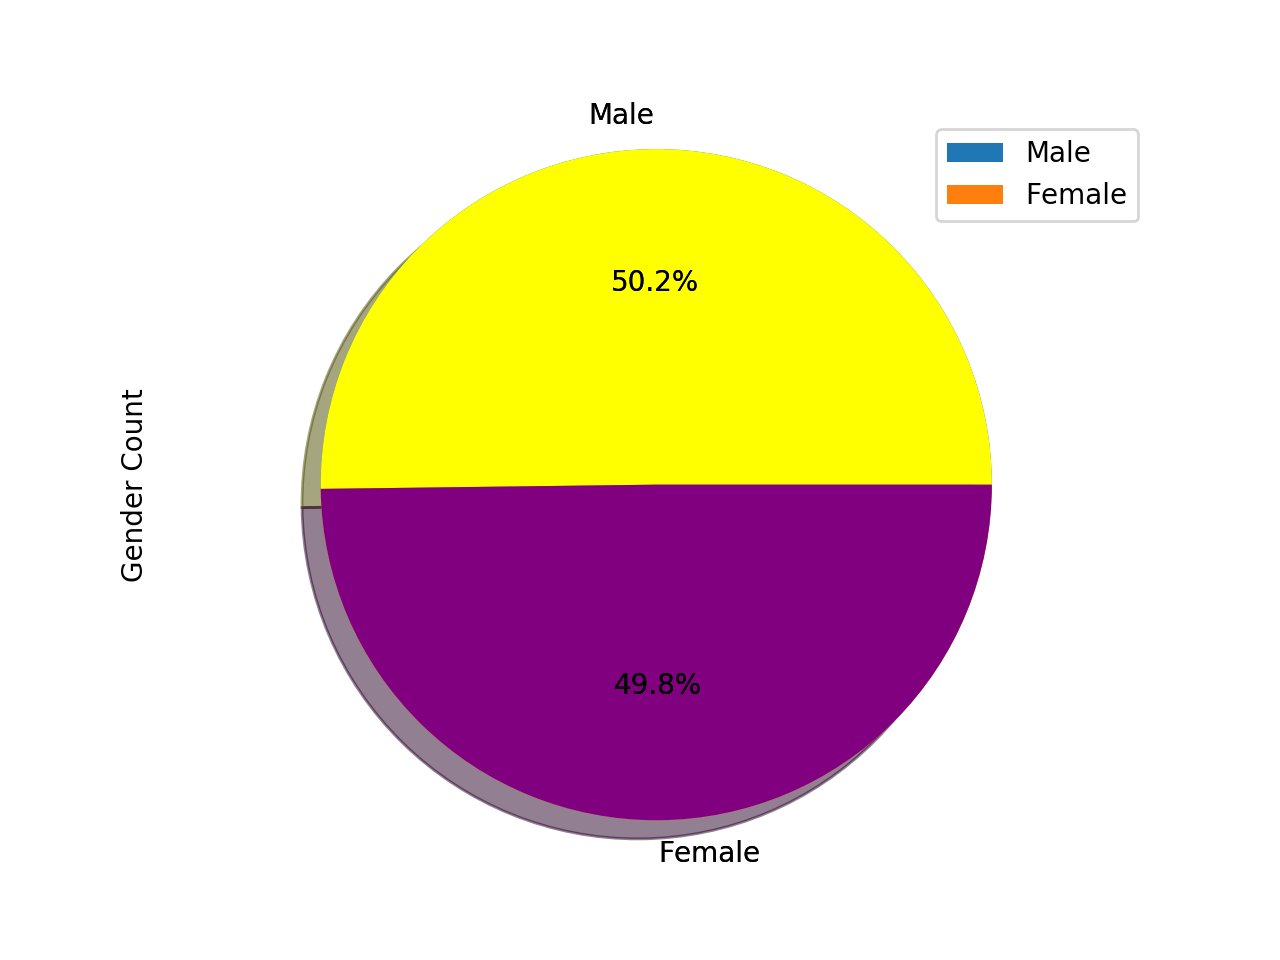

(-1.1016630746735625,
 1.1000791940320744,
 -1.1017685314144794,
 1.1009347297692742)

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender= merged_df[["Mouse ID","Sex"]].drop_duplicates("Mouse ID")

#group by gender
groupby_gender= gender.groupby(["Sex"])

#Create DataFrame
gender_df=groupby_gender["Sex"].count().to_frame(name="Gender Count").reset_index()

#Sorting
gender_df=gender_df.sort_values(["Sex"], ascending=False)

labels=["Male", "Female"]

pie=gender_df.plot.pie(y="Gender Count", labels=labels, autopct="%.1f%%")
plt.show()
plt.axis("equal")

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#different approach. using groupby.

# drop duplicate Mouse IDs
gender = merged_df[["Mouse ID", "Sex"]].drop_duplicates("Mouse ID")
gender

# groupby 
gender_groupby = gender.groupby(["Sex"])
gender_groupby.count()

# reset to be able to sort
gender_df = gender_groupby["Sex"].count().to_frame(name = "Gender Count").reset_index()
gender_df.count().head()

# sort by count
gender_df = gender_df.sort_values(["Sex"], ascending=False)
gender_df

# set x and y
gender_count = gender_df["Gender Count"]
gender = gender_df["Sex"] 

# create pie plot with y label
x_axis = np.arange(0, len(gender_count))
colors = ["yellow", "purple"]
genderPie2 = plt.pie(gender_count, labels=gender, colors=colors,autopct="%1.1f%%", shadow=True)

plt.ylabel("Gender Count")
plt.axis("equal")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# unique drug names
cleaned_df["Drug Regimen"].unique()

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Retrieving columns
tumor_data = cleaned_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)",  "Timepoint"]] 

# set index 
tumor_data = tumor_data.set_index(["Drug Regimen"])

# drop drugs that are not in the top 4
drop_drugs = tumor_data.drop(['Placebo', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'])

#finding the last mouse  
last = drop_drugs.groupby(["Mouse ID"]).tail(1)

# sort by Drug Regimen
last_df= last.sort_values(["Drug Regimen"], ascending=True)
last_df

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,j246,38.753265,35
Capomulin,v923,40.658124,45
Capomulin,w150,39.952347,10
Capomulin,j119,38.125164,45
Capomulin,l509,41.483008,45
...,...,...,...
Ramicane,r921,43.419381,30
Ramicane,w678,43.166373,5
Ramicane,y449,44.183451,15


In [46]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin

# finding the last mouse
last_IQR = last_df[["Tumor Volume (mm3)"]]

# create a dataframe for capomulin and create a tumor series for future use
capomulin = last_IQR.loc[last_df.index == "Capomulin"]
capomulin_tumor = capomulin["Tumor Volume (mm3)"]

# calculations
#Quartiles
capomulin_quart = capomulin_tumor.quantile([.25,.75])
lowerq = capomulin_quart[.25]
upperq = capomulin_quart[.75]
capomulin_IQR = round(upperq-lowerq,3)

#outliers
capomulin_low = round(lowerq - (1.5*capomulin_IQR), 3)
capomulin_up = round(upperq + (1.5*capomulin_IQR),3)
print(f"*Capomulin* Tumor IQR is: {capomulin_IQR}mm3")
print(f"*Capomulin* Tumors smaller than {capomulin_low}mm3 and larger than {capomulin_up}mm3 could be outliers.")
print()

*Capomulin* Tumor IQR is: 7.782mm3
*Capomulin* Tumors smaller than 20.704mm3 and larger than 51.832mm3 could be outliers.

*Ramicane* Tumor IQR is: 9.099mm3
*Ramicane* Tumors smaller than 17.912mm3 and larger than 54.308mm3 could be outliers.



In [47]:
#Ramicane

# create a dataframe for ramicane and create a tumor series for future use
ramicane = last_IQR.loc[last_df.index == "Ramicane"]
ramicane_tumor = ramicane["Tumor Volume (mm3)"]
# calculate IQR and outliers 
rami_quart = ramicane_tumor.quantile([.25,.75])
lowerq = rami_quart[.25]
upperq = rami_quart[.75]

rami_IQR = round(upperq-lowerq,3)
rami_low = round(lowerq - (1.5*rami_IQR), 3)
rami_up = round(upperq + (1.5*rami_IQR),3)
print(f"Ramicane Tumor IQR is: {rami_IQR}mm3")
print(f"Ramicane Tumors smaller than {rami_low}mm3 and larger than {rami_up}mm3 could be outliers.")
print()

Ramicane Tumor IQR is: 9.099mm3
Ramicane Tumors smaller than 17.912mm3 and larger than 54.308mm3 could be outliers.



In [50]:
#Infubinol

# create a dataframe for Infubinol 
infubinol = last_IQR.loc[last_df.index == "Infubinol"]
infubinol_tumor = infubinol["Tumor Volume (mm3)"]

# calculate IQR and outliers
infubinol_quart = infubinol_tumor.quantile([.25,.75])
lowerq = infubinol_quart[.25]
upperq = infubinol_quart[.75]

infubinol_IQR = round(upperq-lowerq,3)
infubinol_low = round(lowerq - (1.5*infubinol_IQR), 3)
infubinol_up = round(upperq + (1.5*infubinol_IQR),3)
print(f"Infubinol Tumor IQR is: {infubinol_IQR}mm3")
print(f"Infubinol Tumors smaller than {infubinol_low}mm3 and larger than {infubinol_up}mm3 could be outliers.")
print()

Infubinol Tumor IQR is: 11.477mm3
Infubinol Tumors smaller than 36.833mm3 and larger than 82.741mm3 could be outliers.



In [51]:
#Ceftamin

# create a dataframe for Ceftamin and create a tumor series for future use
ceftamin = last_IQR.loc[last_df.index == "Ceftamin"]
ceftamin_tumor = ceftamin["Tumor Volume (mm3)"]

# calculate IQR and outliers
ceftamin_quart = ceftamin_tumor.quantile([.25,.75])
lowerq = ceftamin_quart[.25]
upperq = ceftamin_quart[.75]

ceftamin_IQR = round(upperq-lowerq,3)
ceftamin_low = round(lowerq - (1.5*ceftamin_IQR), 3)
ceftamin_up = round(upperq + (1.5*ceftamin_IQR),3)
print(f"Ceftamin Tumor IQR is: {ceftamin_IQR}mm3")
print(f"Ceftamin Tumors smaller than {ceftamin_low}mm3 and larger than {ceftamin_up}mm3 could be outliers.")

*Ceftamin* Tumor IQR is: 15.578mm3
*Ceftamin* Tumors smaller than 25.355mm3 and larger than 87.667mm3 could be outliers.


<IPython.core.display.Javascript object>


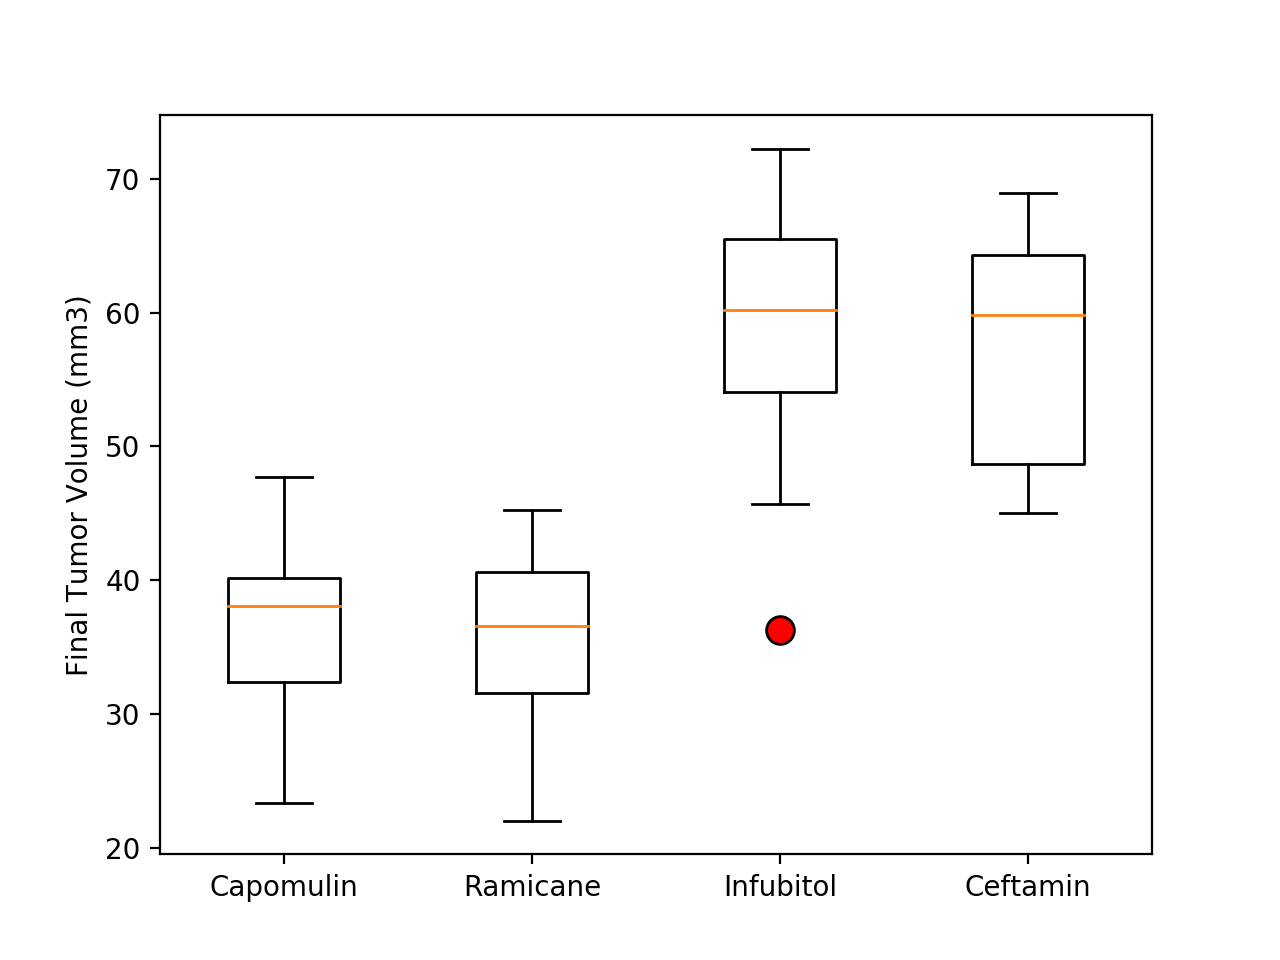

Text(0, 0.5, 'Final Tumor Volume (mm3)')

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest. This is dependent on the box plot dataset(above)
#box plot
fig, ax = plt.subplots()
redCircle = dict(markerfacecolor='r', marker='o', markersize=10)
ax.boxplot([capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor], labels=["Capomulin", "Ramicane", "Infubitol", "Ceftamin"], flierprops=redCircle)              
ax.set_ylabel("Final Tumor Volume (mm3)")      

## Line and Scatter Plots

<IPython.core.display.Javascript object>


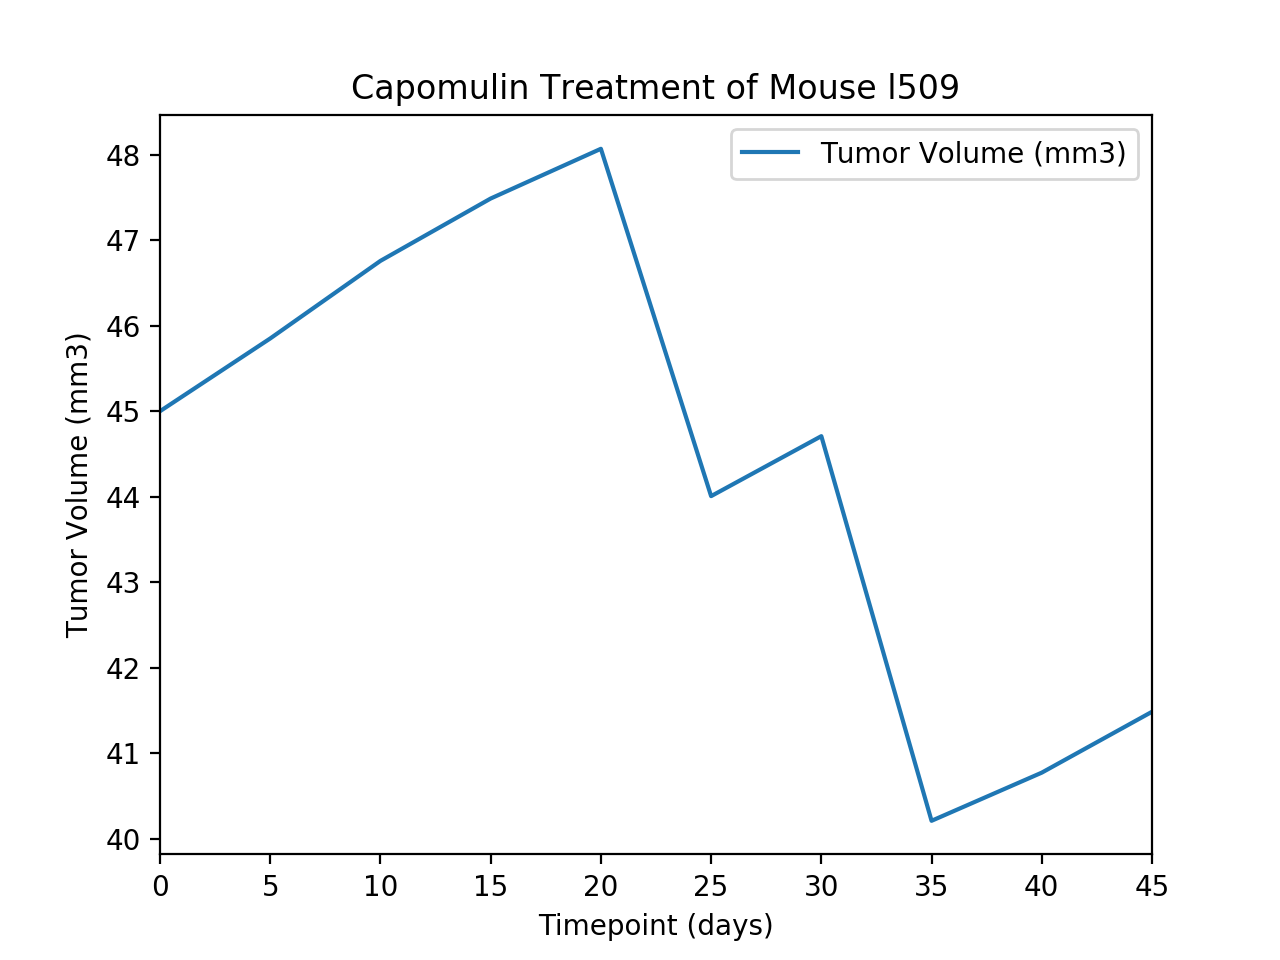

Text(0, 0.5, 'Tumor Volume (mm3)')

In [42]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin. Line graphs are used to track changes over short and long periods of time.

# Filtering for mouse 
capomulin_time = cleaned_df[cleaned_df['Mouse ID'] == "l509"]

# Retrieve columns
capomulin_time = capomulin_time[["Timepoint", "Tumor Volume (mm3)"]]

# set the index
capomulin_time = capomulin_time.set_index(["Timepoint"])
capomulin_time

# create plot with title and x and y labels
capomulin_time.plot(title="Capomulin Treatment of Mouse l509") 
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

<IPython.core.display.Javascript object>


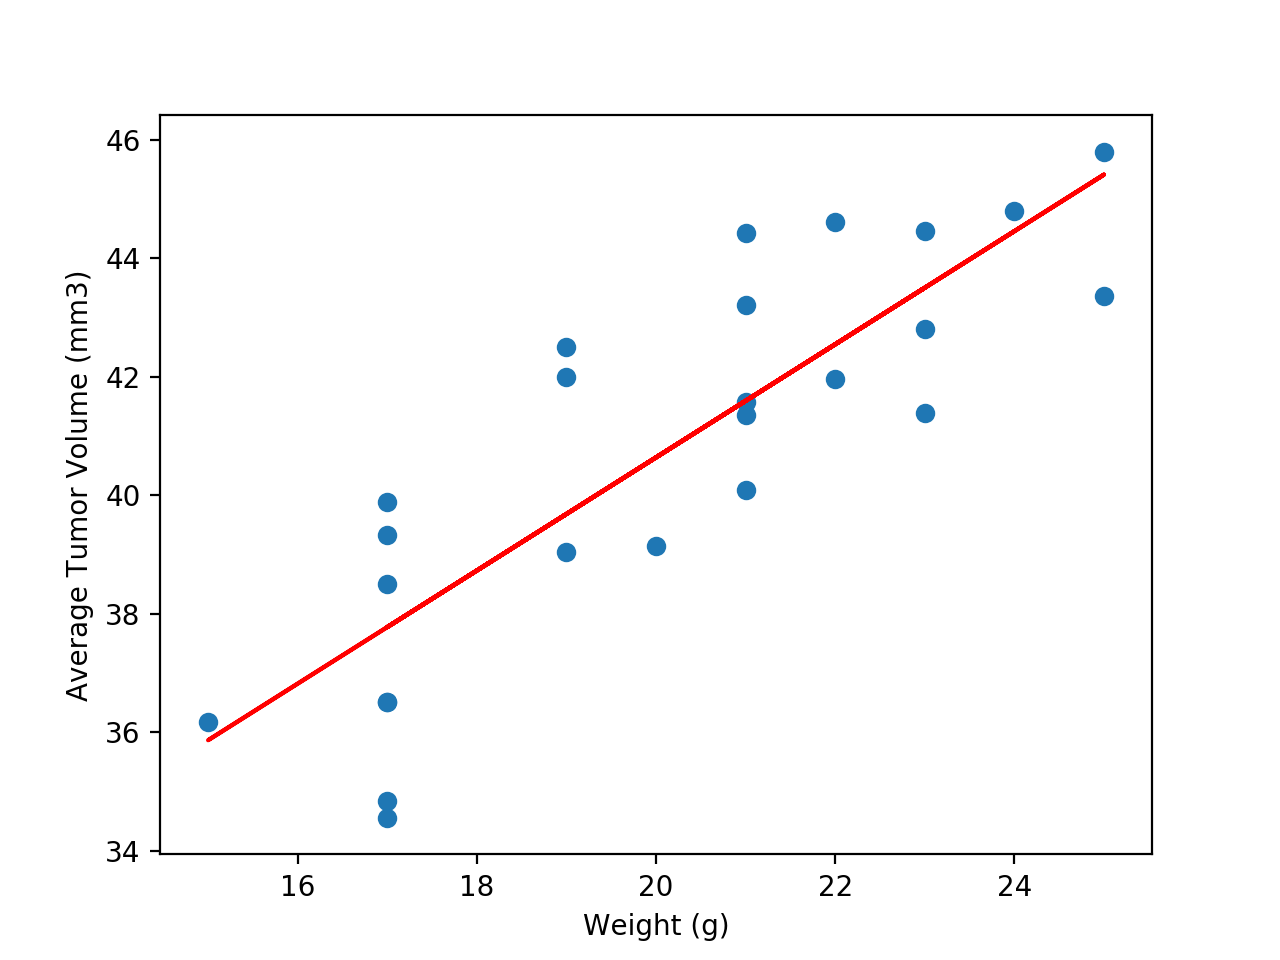

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen. Note to self: use the groupby methodology when creating these graphs.

# filtering for mouse
capomuline_weight  = cleaned_df[cleaned_df['Drug Regimen'] == "Capomulin"]


# columns
capomuline_weight = capomuline_weight[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

# groupby 
capomuline_weight_groupby = capomuline_weight.groupby(["Mouse ID"]).mean()


# rename columns for a different y label
capomuline_weight_groupby = capomuline_weight_groupby.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
capomuline_weight_groupby

# create plot
capomuline_weight_groupby.plot(kind="scatter",x="Weight (g)", y="Average Tumor Volume (mm3)", title="") 



## Correlation and Regression

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Retrieving columns from scatter plot graph
capomuline_correlation_df = capomuline_weight_groupby[["Weight (g)", "Average Tumor Volume (mm3)"]]


# set x and y
weight= capomuline_correlation_df["Weight (g)"]
avg_tumor_volume = capomuline_correlation_df["Average Tumor Volume (mm3)"]

# calculate correlation
correlation = sts.pearsonr(weight,avg_tumor_volume)
print(f' The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.')

# create scatterplot with line regression, x and y labels. discussed in class. 
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,avg_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,avg_tumor_volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

 The correlation between mouse weight and the average tumor volume is 0.84.
